In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Designing a lowpass FIR Filter

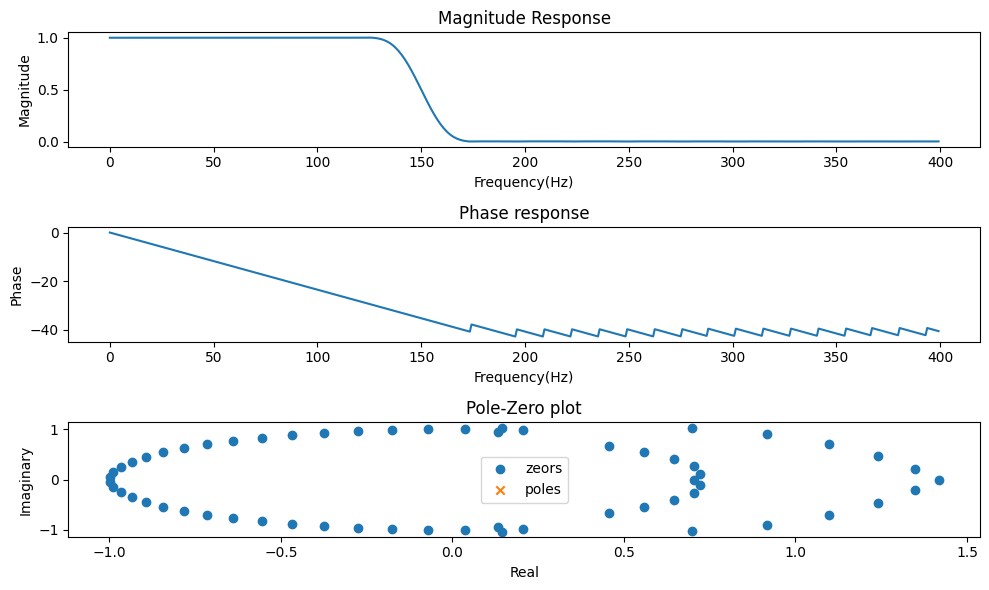

In [61]:
N = 60 # Order of filter
fs = 800 # sampling frequency
fc = 150 #cutoff frequency
b = sig.firwin(N+1, fc, fs=fs, window='hamming', pass_zero='lowpass')
w, h_freq = sig.freqz(b, 1, fs=fs)
z, p, k = sig.tf2zpk(b,1)

# Filter Ploting
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(w, np.abs(h_freq))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')
plt.subplot(3,1,2)
plt.plot(w, np.unwrap(np.angle(h_freq)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase')
plt.title('Phase response')
plt.subplot(3,1,3)
plt.scatter(np.real(z), np.imag(z), marker='o', label='zeors')
plt.scatter(np.real(p), np.imag(p), marker='x', label='poles')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero plot')
plt.legend()
plt.tight_layout()
plt.show()

Creating a new signal, x. And filter the signal x by the lowpass filter described above

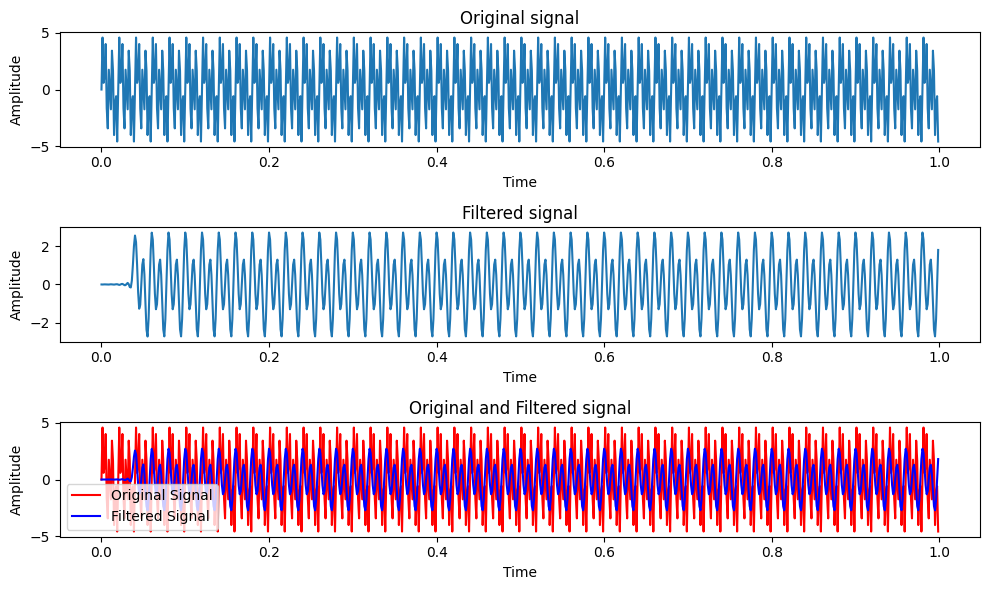

In [62]:
# Generating new signal 
f1 = 50
f2 = 100
f3 = 250
t = np.arange(0,1,1/fs)
x = np.sin(2*np.pi*f1*t) + 2* np.sin(2*np.pi*f2*t) + 3*np.sin(2*np.pi*f3*t)
filtered = sig.lfilter(b, [1.0], x)

# Figure of original and filtered signal
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.subplot(3,1,2)
plt.plot(t, filtered)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered signal')
plt.subplot(3,1,3)
plt.plot(t, x, 'r', label='Original Signal')
plt.plot(t,filtered, 'b', label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original and Filtered signal')
plt.legend()
plt.tight_layout()
plt.show()

FFT of the original and filtered signal

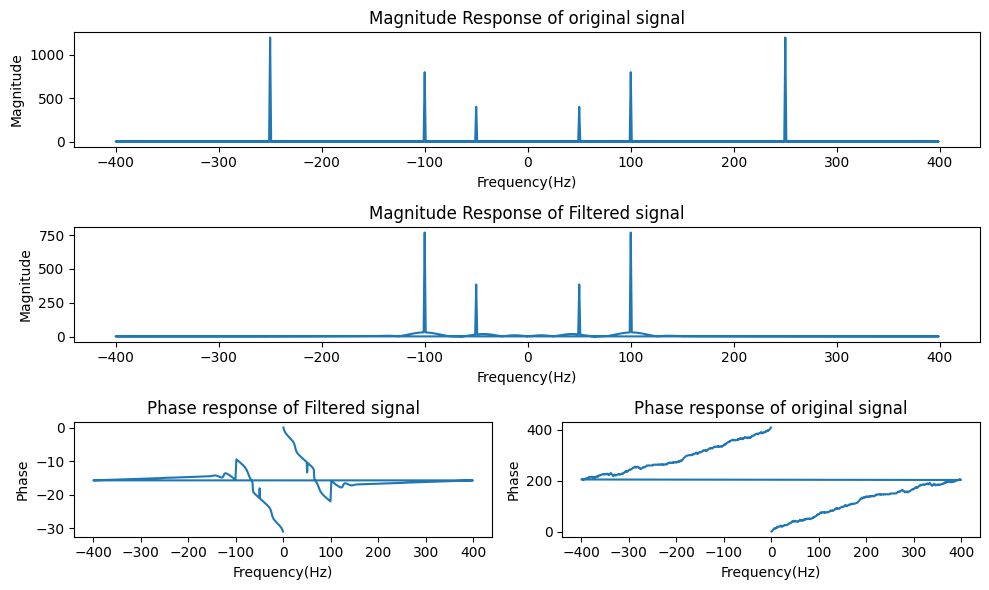

In [63]:
# Now fft of the filtered and original signal
F = np.fft.fft(filtered)
F_original = np.fft.fft(x)
w = np.fft.fftfreq(len(filtered), d=1/fs)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(w, np.abs(F_original))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of original signal')
plt.subplot(3,1,2)
plt.plot(w, np.abs(F))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of Filtered signal')
plt.subplot(3,2,5)
plt.plot(w, np.unwrap(np.angle(F)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase')
plt.title('Phase response of Filtered signal')
plt.subplot(3,2,6)
plt.plot(w, np.unwrap(np.angle(F_original)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase')
plt.title('Phase response of original signal')
plt.tight_layout()
plt.show()